# Dataset choice

This notebook aims to explore different datasets. Metrics to use will be `accuracy` and `loss`. 

I will like to explore having unbalanced dataset for some classes with hypothesis in mind that it will lead to more accurate prediction in terms of `Accuracy score` and also `better prediction of tougher vegetables to distinguish, for this case, between kailan and Chyesim`

1) ***Larger_Dataset***: 1000 images per class 
2) ***Smaller_Dataset***: 166 images per class
3) ***Unbalanced_Dataset***: 4500-5500 images for some classes, while others will be 1000 images per class 

**Criterias kept constant**
- Ratio between train and validation is the same, (Train: 0.833 | Validation: 0.167)
- Size standardized to 224 
- Simple model used will be the same. 
- No augmentation
- No preprocessing


# Import Libraries 

In [1]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.1.0
Keras Version: 2.2.4-tf

Python 3.7.13 (default, Mar 28 2022, 08:03:21) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.4
Scikit-Learn 1.0.2
GPU is available


In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import  MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,confusion_matrix
import datetime
import itertools
import os
import cv2
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter(action= 'ignore', category=FutureWarning)
%matplotlib inline

# Path Creation

To create 3 different paths for imagegeneration later

In [3]:
train_path_large = '../data/dataset/train/'
test_path_large = '../data/dataset/val/'

In [4]:
train_path_small = '../data/dataset_smaller/train/'
test_path_small = '../data/dataset_smaller/val/'

In [5]:
train_path_unbalanced = '../data/dataset_unbalanced/train/'
test_path_unbalanced = '../data/dataset_unbalanced/val/'

In [6]:
folders = glob.glob(train_path_large + '*')

train_list = pd.DataFrame(glob.glob(train_path_large + '*')).rename(columns = {0: 'name'})
# generate ordinal categories for y

train_list['class_name'] = train_list.name.apply(lambda x: x.split("\\")[1])

classes = train_list['class_name'].unique().tolist()

In [7]:
# Creating function to create batches with no augmentation and preprocessing 
def create_batches(train_path, test_path):

    train_batches = ImageDataGenerator(
        rescale = 1./225,
    ).flow_from_directory(directory = train_path, target_size = (224,224), class_mode = 'categorical', batch_size = 32)

    test_batches = ImageDataGenerator(
        rescale = 1./225,
    ).flow_from_directory(directory = test_path, target_size = (224,224), class_mode = 'categorical',batch_size = 32)

    return train_batches, test_batches

# CNN Modelling Iteration

In [44]:
def create_model(train_batch, test_batch, eps):

    # Instantiate a CNN.
    cnn_model = Sequential()

    # Add a convolutional layer.
    cnn_model.add(Conv2D(filters=22,             # number of filters
                        kernel_size=(3,3),      # height/width of filter
                        activation='relu',      # activation function 
                        padding = 'same',
                        input_shape=(224,224,3))) # shape of input (image)

    # Add a pooling layer.
    cnn_model.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

    # Add another convolutional layer.
    cnn_model.add(Conv2D(44,
                        kernel_size=(3,3),
                        padding = 'same',
                        activation='relu'))

    # Add another pooling layer.
    cnn_model.add(MaxPooling2D(pool_size=(2,2)))

    # We have to remember to flatten to go from the "box" to the vertical line of nodes!
    cnn_model.add(Flatten())

    # Add a densely-connected layer with 64 neurons.
    cnn_model.add(Dense(88, activation='relu'))

    # Let's try to avoid overfitting!
    cnn_model.add(Dropout(0.2))

    # Add a densely-connected layer with 32 neurons.
    cnn_model.add(Dense(44, activation='relu'))

    # Let's try to avoid overfitting!
    cnn_model.add(Dropout(0.2))

    # Add a final layer 
    cnn_model.add(Dense(len(classes), activation='softmax'))

    # Compile model
    cnn_model.compile(loss='categorical_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])


    # Fit model on training data
    history = cnn_model.fit_generator(train_batch,
                            validation_data = test_batch,
                            epochs=eps,
                            verbose=1,
                            steps_per_epoch = len(train_batch),
                            validation_steps = len(test_batch),
                            )


    return history, cnn_model

## **#Dataset 1** - Larger and Equal Dataset in each class 

In [48]:
# create batch
train_batch_large, test_batch_large = create_batches(train_path_large, test_path_large)
# create history and CNN model 
hist_large, model_large = create_model(train_batch_large, test_batch_large,10)

Found 22002 images belonging to 22 classes.
Found 4400 images belonging to 22 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 688 steps, validate for 138 steps
Epoch 1/10
688/688 [==============================] - 86s 125ms/step - loss: 2.1942 - accuracy: 0.3141 - val_loss: 1.4444 - val_accuracy: 0.5145s: 2.8112 - accuracy - - ETA:  - ETA: 44s - loss: 2.6423 - accuracy: 0.19 - ETA: 43s - loss: 2.6400 -  - ETA: 42s - loss: 2.6108 - accur -  -  - ETA: 26s - loss: 2. - ETA: 24s - l - ETA: 1s - l
Epoch 2/10
688/688 [==============================] - 36s 52ms/step - loss: 1.3851 - accuracy: 0.5455 - val_loss: 0.9281 - val_accuracy: 0.7039
Epoch 3/10
688/688 [==============================] - 36s 53ms/step - loss: 1.0193 - accuracy: 0.6605 - val_loss: 0.7590 - val_accuracy: 0.7561
Epoch 4/10
688/688 [==============================] - 37s 54ms/step - loss: 0.7876 - accuracy: 0.7391 - val_loss: 0.5723 - val_accuracy: 0.8257
Epoch 5/10
688/688 [=============================

## **#Dataset 2** - Smaller and Equal Dataset in each class 

In [47]:
# create batch
train_batch_small, test_batch_small = create_batches(train_path_small, test_path_small)
# create history and CNN model 
hist_small, model_small = create_model(train_batch_small, test_batch_small,10)

Found 3652 images belonging to 22 classes.
Found 748 images belonging to 22 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 115 steps, validate for 24 steps
Epoch 1/10
115/115 [==============================] - 9s 81ms/step - loss: 3.1458 - accuracy: 0.0898 - val_loss: 2.6839 - val_accuracy: 0.1992
Epoch 2/10
115/115 [==============================] - 6s 53ms/step - loss: 2.4645 - accuracy: 0.2344 - val_loss: 2.0299 - val_accuracy: 0.3997
Epoch 3/10
115/115 [==============================] - 6s 53ms/step - loss: 1.9711 - accuracy: 0.3809 - val_loss: 1.6244 - val_accuracy: 0.5134
Epoch 4/10
115/115 [==============================] - 5s 46ms/step - loss: 1.5878 - accuracy: 0.4948 - val_loss: 1.4059 - val_accuracy: 0.5575
Epoch 5/10
115/115 [==============================] - 5s 46ms/step - loss: 1.2787 - accuracy: 0.5830 - val_loss: 1.2705 - val_accuracy: 0.5829
Epoch 6/10
115/115 [==============================] - 5s 47ms/step - loss: 1.0006 - accuracy: 0.6599 - val_

## **#Dataset 3** - Unbalanced Dataset in each class 

In [45]:
# create batch
train_batch_unbalanced, test_batch_unbalanced = create_batches(train_path_unbalanced, test_path_unbalanced)
# create history and CNN model 
hist_unbalanced, model_unbalanced = create_model(train_batch_unbalanced, test_batch_unbalanced,10)

Found 52090 images belonging to 22 classes.
Found 10443 images belonging to 22 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1628 steps, validate for 327 steps
Epoch 1/10
1628/1628 [==============================] - 79s 48ms/step - loss: 1.6614 - accuracy: 0.4565 - val_loss: 0.8140 - val_accuracy: 0.7603
Epoch 2/10
1628/1628 [==============================] - 80s 49ms/step - loss: 0.8691 - accuracy: 0.7097 - val_loss: 0.5352 - val_accuracy: 0.8340
Epoch 3/10
1628/1628 [==============================] - 79s 48ms/step - loss: 0.6279 - accuracy: 0.7908 - val_loss: 0.4636 - val_accuracy: 0.8558
Epoch 4/10
1628/1628 [==============================] - 83s 51ms/step - loss: 0.4964 - accuracy: 0.8364 - val_loss: 0.3922 - val_accuracy: 0.8797
Epoch 5/10
1628/1628 [==============================] - 77s 47ms/step - loss: 0.4223 - accuracy: 0.8596 - val_loss: 0.3645 - val_accuracy: 0.8913
Epoch 6/10
1628/1628 [==============================] - 78s 48ms/step - loss: 0.3516 - 

Text(0.5, 0.92, 'Lineplots showing loss and accuracy 3 Types of Datasets')

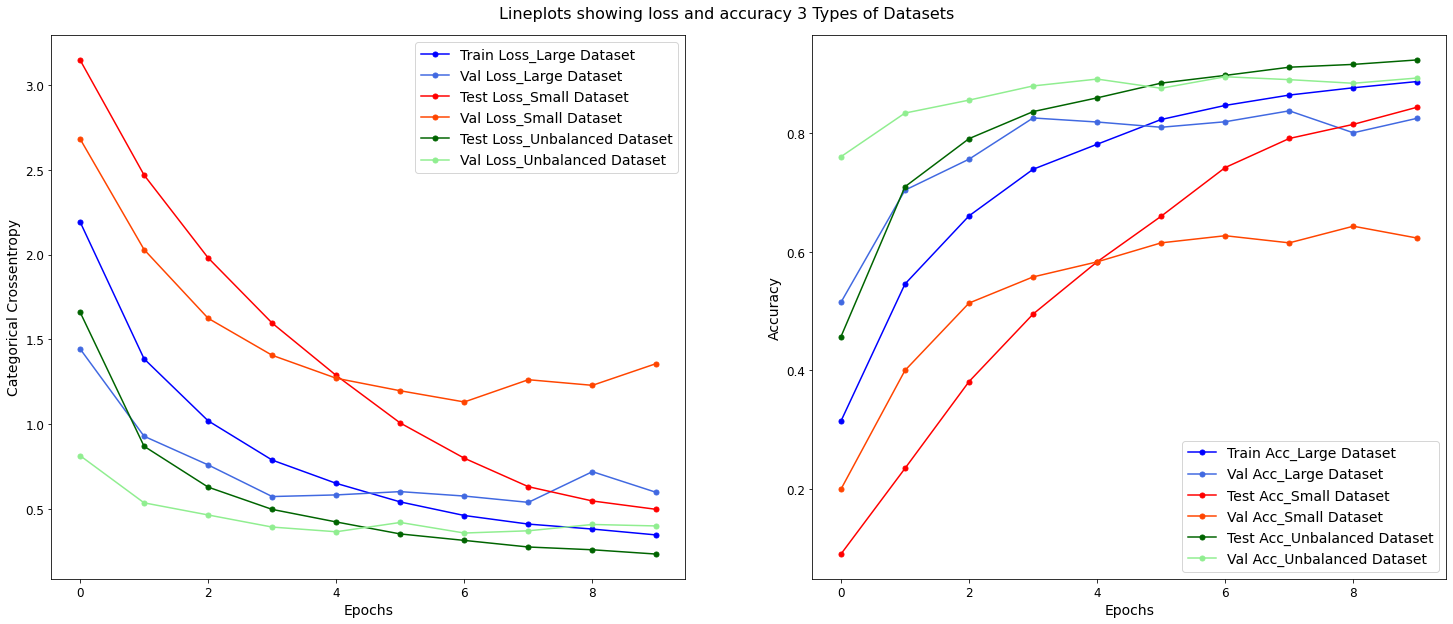

In [49]:
# Checking the train and test loss and accuracy values from the neural network above.

train_loss_large = hist_large.history['loss']
train_loss_small = hist_small.history['loss']
train_loss_unbalanced = hist_unbalanced.history['loss']

test_loss_large = hist_large.history['val_loss']
test_loss_small = hist_small.history['val_loss']
test_loss_unbalanced = hist_unbalanced.history['val_loss']

train_acc_large = hist_large.history['accuracy']
train_acc_small = hist_small.history['accuracy']
train_acc_unbalanced = hist_unbalanced.history['accuracy']

test_acc_large = hist_large.history['val_accuracy']
test_acc_small = hist_small.history['val_accuracy']
test_acc_unbalanced = hist_unbalanced.history['val_accuracy']

# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(25,10))

ax = ax.ravel()

ax[0].plot(train_loss_large, label='Train Loss_Large Dataset', color='blue', marker='o', markersize=5)
ax[0].plot(test_loss_large, label='Val Loss_Large Dataset', color='royalblue', marker='o', markersize=5)
ax[0].plot(train_loss_small, label='Test Loss_Small Dataset', color = 'red', marker='o', markersize=5)
ax[0].plot(test_loss_small, label='Val Loss_Small Dataset', color = 'orangered', marker='o', markersize=5)
ax[0].plot(train_loss_unbalanced, label='Test Loss_Unbalanced Dataset', color = 'darkgreen', marker='o', markersize=5)
ax[0].plot(test_loss_unbalanced, label='Val Loss_Unbalanced Dataset', color = 'lightgreen', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_acc_large, label='Train Acc_Large Dataset', color='blue', marker='o', markersize=5)
ax[1].plot(test_acc_large, label='Val Acc_Large Dataset', color='royalblue', marker='o', markersize=5)
ax[1].plot(train_acc_small, label='Test Acc_Small Dataset', color = 'red', marker='o', markersize=5)
ax[1].plot(test_acc_small, label='Val Acc_Small Dataset', color = 'orangered', marker='o', markersize=5)
ax[1].plot(train_acc_unbalanced, label='Test Acc_Unbalanced Dataset', color = 'darkgreen', marker='o', markersize=5)
ax[1].plot(test_acc_unbalanced, label='Val Acc_Unbalanced Dataset', color = 'lightgreen', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy 3 Types of Datasets", fontsize=16)


**Observation**

While model with larger dataset has higher accuracy and lower loss score, the model with unbalanced dataset far beats the other two models. 

This helps to conclude that despite classes being imbalanced, it will not affect the accuracy of predicting the classes negatively, but rather positively as the number of images increases in the dataset. 

Like they say, the neural network is as good as it gets! 

# Image Validation (Unbalanced Class)

In [13]:
# define plotimages to take in array and show image 
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10,figsize = (20,20))
    axes = axes.flatten()

    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


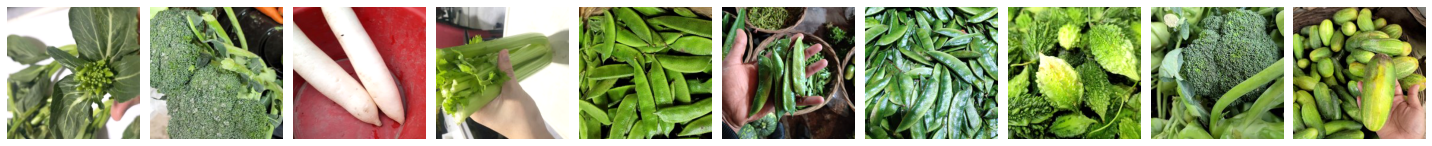

In [61]:
# plot a series of images 
imgs, labels = next(test_batch_small)
plotImages(imgs)

Taking last picture: 1st place from the left

In [74]:
# finding actual image from batch 
picture_num = 0
img_arr = imgs[picture_num]
pd.DataFrame(labels[picture_num],classes)[pd.DataFrame(labels[picture_num],classes)[0] == 1]

,0
Baby_Chyesim,1.0


Chosen picture is a `Baby Chyesim`. 

Lets check across all 3 types of dataset training with same CNN model

## **#Dataset 1** - Image Validation Prob% = `96%`

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


,Probability
Baby_Chyesim,0.963489
Kailan,0.032582
Parsley,0.003313


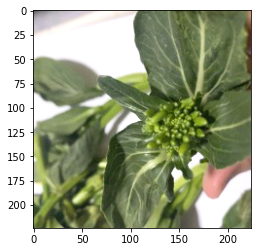

In [75]:
# show top 3 probability by model

plt.imshow(img_arr)
pd.DataFrame(model_large.predict(img_arr.reshape(1,224,224,3)).reshape(22,1),classes).rename(columns= {0: 'Probability'}).sort_values(by = 'Probability', ascending = False).head(3)

## **#Dataset 2** - Image Validation: `Wrongly Classified`

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


,Probability
Coriander,0.526956
Parsley,0.297730
Baby_Chyesim,0.094514


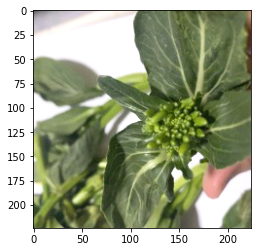

In [76]:
# show top 3 probability by model

plt.imshow(img_arr)
pd.DataFrame(model_small.predict(img_arr.reshape(1,224,224,3)).reshape(22,1),classes).rename(columns= {0: 'Probability'}).sort_values(by = 'Probability', ascending = False).head(3)

## **#Dataset 3** - Image Validation Prob% = `99.9%`

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


,Probability
Baby_Chyesim,0.999960
Kailan,0.000037
Broccoli,0.000003


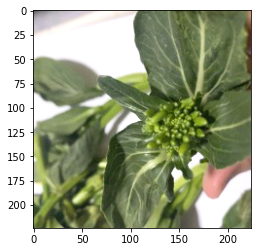

In [77]:
# show top 3 probability by model
plt.imshow(img_arr)
pd.DataFrame(model_unbalanced.predict(img_arr.reshape(1,224,224,3)).reshape(22,1),classes).rename(columns= {0: 'Probability'}).sort_values(by = 'Probability', ascending = False).head(3)

# Image Validation on Minority groups

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

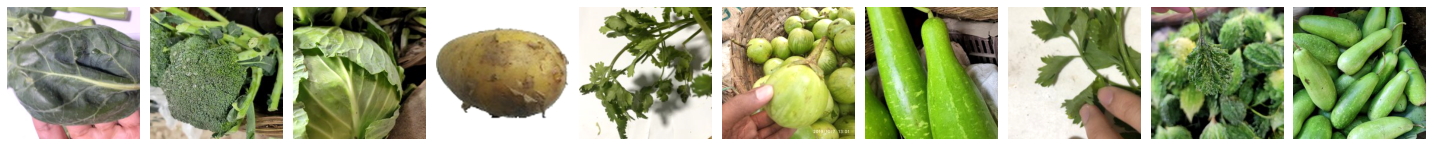

In [ ]:
# plot a series of images 
imgs, labels = next(test_batch_small)
plotImages(imgs)

Taking last picture: 6th place from the Left

In [87]:
# finding actual image from batch 
picture_num = 5
img_arr = imgs[picture_num]
pd.DataFrame(labels[picture_num],classes)[pd.DataFrame(labels[picture_num],classes)[0] == 1]

,0
Brinjal,1.0


Chosen picture is a `Brinjal`. 

Lets check across all 3 types of dataset training with same CNN model

## **#Dataset 1** - Image Validation Prob% = `97%`

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


,Probability
Brinjal,0.978300
Cabbage,0.013799
Bottle_Gourd,0.005335


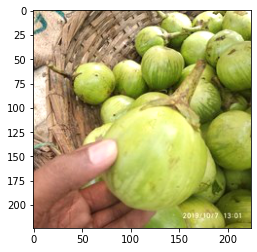

In [88]:
# show top 3 probability by model
plt.imshow(img_arr)
pd.DataFrame(model_large.predict(img_arr.reshape(1,224,224,3)).reshape(22,1),classes).rename(columns= {0: 'Probability'}).sort_values(by = 'Probability', ascending = False).head(3)

## **#Dataset 2** - Image Validation: `Wrongly Classified`

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


,Probability
Coriander,0.256982
Baby_Chyesim,0.241637
Tomato,0.140087


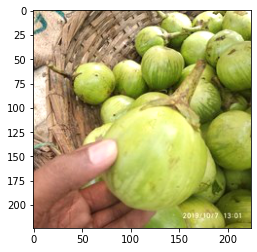

In [89]:
# show top 3 probability by model
plt.imshow(img_arr)
pd.DataFrame(model_small.predict(img_arr.reshape(1,224,224,3)).reshape(22,1),classes).rename(columns= {0: 'Probability'}).sort_values(by = 'Probability', ascending = False).head(3)

## **#Dataset 3** - Image Validation Prob% = `99.3%`

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


,Probability
Brinjal,0.993167
Cucumber,0.003773
Bottle_Gourd,0.002720


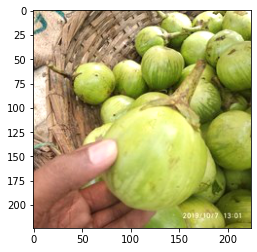

In [90]:
# show top 3 probability by model
plt.imshow(img_arr)
pd.DataFrame(model_unbalanced.predict(img_arr.reshape(1,224,224,3)).reshape(22,1),classes).rename(columns= {0: 'Probability'}).sort_values(by = 'Probability', ascending = False).head(3)

The probability from the Dataset #3 is higher than that of Dataset #1 even though we did not fit in more dataset for this particular class.

This illustrates that the model was trained to pick up more distinct features of those high images classes, and thus also in return classify more accurately on other balanced classes. 

# Conclusion

In [ ]:
loss_unbalanced, val_acc_unbalanced = model_unbalanced.evaluate(test_batch_unbalanced)

  ...
    to  
  ['...']
327/327 [==============================] - 15s 45ms/step - loss: 0.3988 - accuracy: 0.8931


In [ ]:
loss_large, val_acc_large = model_large.evaluate(test_batch_large)

  ...
    to  
  ['...']
138/138 [==============================] - 6s 45ms/step - loss: 0.5965 - accuracy: 0.8252 0s - loss: 0.5912 - accu


In [ ]:
# calculate percentage change from model large to model unbalanced

print(f'Percentage improvement: {round((val_acc_unbalanced - val_acc_large) / val_acc_large * 100, 1)}%')

Percentage improvement: 8.2%


We can observe that the higher the accuracy score, naturally the model is able to predict the vegetable accurately. From the example of predicting Chyesim above, I can summarize a few findings: 

- For unbalanced dataset, even though images per class are different and can be very one sided (where some has 5000+ images while others have 1000 images), the accuracy did not suffer from it. In fact, it improved by 6.7% from model with large, and equal dataset. 
- Classification between kailan and chyesim was greatly distinguished by the unbalanced dataset, suggesting more pictures focusing on chyesim and kailan plays a huge role, assuming ratio between the train and validation remains the same
- Accuracy is not only improved for imbalanced class (> 1000 images per class), but also for the balanced class (1000 images per class).